<a href="https://colab.research.google.com/github/anasjawed283/MachineLearningBasics/blob/main/LAB_4_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import random

# Given data
data = {
    'Student type': ['Hosteller', 'DAYscholar', 'Hosteller', 'DAYscholar', 'Hosteller', 'DAYscholar'],
    'CGPA': [9, 8, 7, 8, 9, 7],
    'Attendance': ['High', 'Average', 'Low', 'High', 'Average', 'Low'],
    'Backlogs': ['N', 'Y', 'Y', 'N', 'N', 'Y'],
    'Registration slot': ['S1', 'S2', 'S3', 'S1', 'S2', 'S3']
}

# Generate a larger dataset by repeating and randomizing the original data
num_students = 40
random.seed(42)

# Create the larger dataset by sampling from the given data
expanded_data = {
    'Student type': [random.choice(data['Student type']) for _ in range(num_students)],
    'CGPA': [random.choice(data['CGPA']) for _ in range(num_students)],
    'Attendance': [random.choice(data['Attendance']) for _ in range(num_students)],
    'Backlogs': [random.choice(data['Backlogs']) for _ in range(num_students)],
    'Registration slot': [random.choice(data['Registration slot']) for _ in range(num_students)]
}

# Create a DataFrame
df = pd.DataFrame(expanded_data)
df.head(40)



,Student type,CGPA,Attendance,Backlogs,Registration slot
0,DAYscholar,7,Average,N,S3
1,Hosteller,8,Low,Y,S1
2,Hosteller,8,Low,N,S3
3,DAYscholar,7,Average,Y,S2
4,Hosteller,9,Low,Y,S3
5,DAYscholar,9,Low,Y,S3
6,DAYscholar,8,Low,Y,S3
7,DAYscholar,9,Low,Y,S1
8,DAYscholar,7,Low,N,S3
9,Hosteller,7,High,N,S1


In [2]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df['Student type'] = label_encoder.fit_transform(df['Student type'])
df['Attendance'] = label_encoder.fit_transform(df['Attendance'])
df['Backlogs'] = label_encoder.fit_transform(df['Backlogs'])
df['Registration slot'] = label_encoder.fit_transform(df['Registration slot'])

# Separate features and target variable
X = df.drop(columns=['Registration slot'])
y = df['Registration slot']

# Display the preprocessed data
print(X)
print(y)


    Student type  CGPA  Attendance  Backlogs
0              0     7           0         0
1              1     8           2         1
2              1     8           2         0
3              0     7           0         1
4              1     9           2         1
5              0     9           2         1
6              0     8           2         1
7              0     9           2         1
8              0     7           2         0
9              1     7           1         0
10             0     9           0         1
11             0     7           2         1
12             1     9           0         0
13             1     7           0         0
14             1     8           2         0
15             0     9           0         0
16             1     9           0         1
17             1     8           1         1
18             1     9           1         1
19             0     9           2         0
20             0     7           2         0
21        

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')  # Using 'entropy' for ID3-like behavior
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.42
Precision: 0.44
Recall: 0.42
F1 Score: 0.39


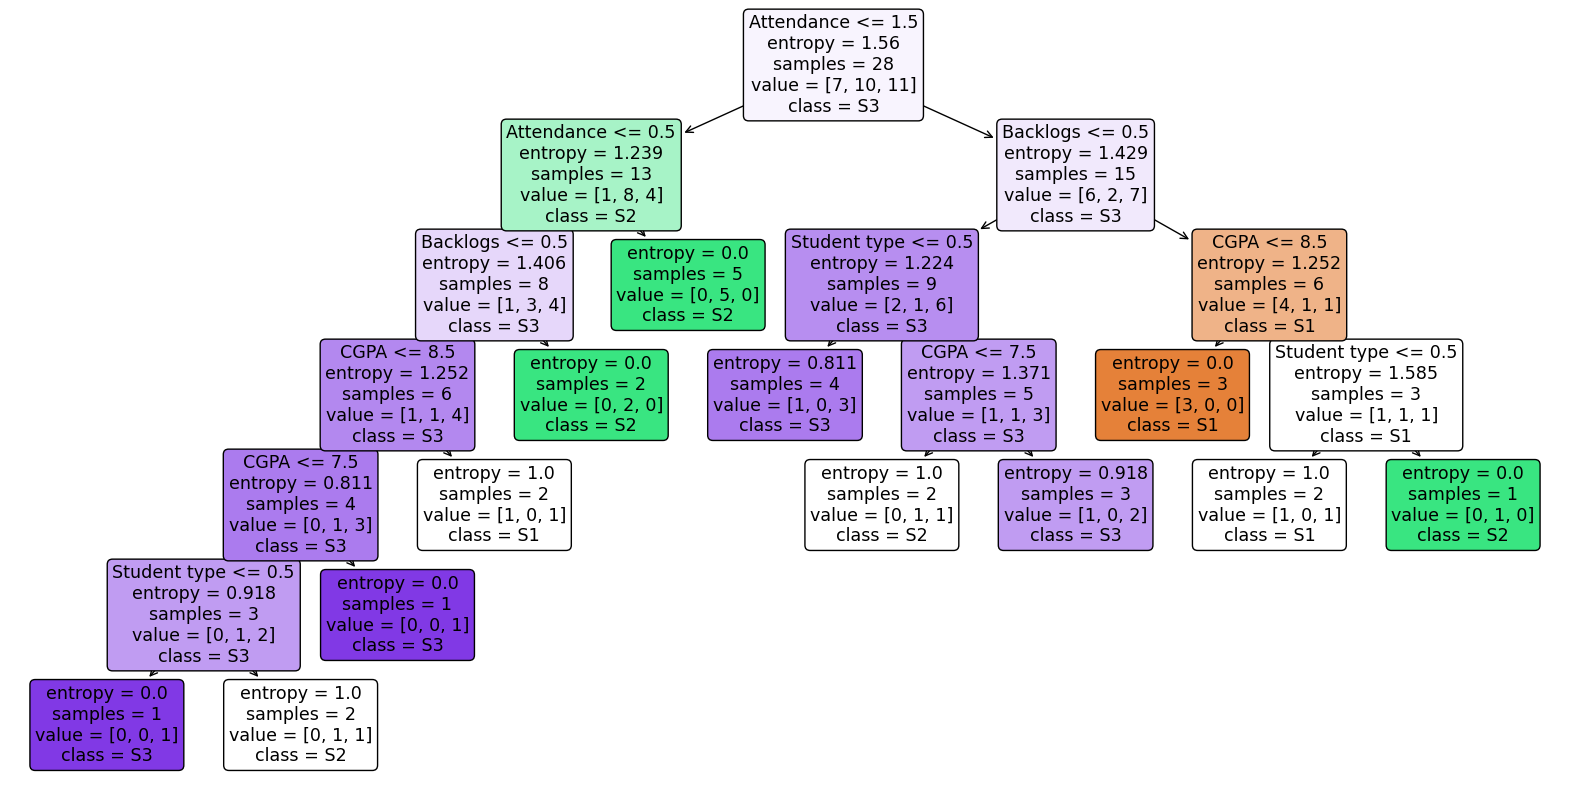

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.show()
